#Linear Regression

In [213]:
iterations = 630 #@param {type:"slider", min:100, max:1000, step:10}
different_alpha = 10 #@param {type:"slider", min:1, max:20, step:1}
lambda_var = 7 #@param {type:"slider", min:0, max:500, step:1}

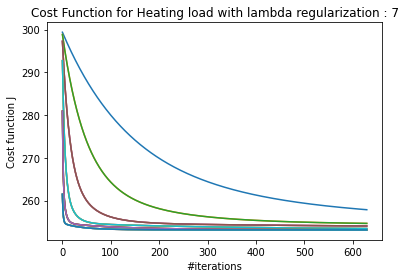

alpha optimal : 0.24300000000000005
Sum error : 1600.8899570689698
Max error : 9.365641050521482
Min error : 0.0016498188645250877


In [214]:
def feature_scaling(features):
  features_scaled = features.copy()
  for i in range(features.shape[1]):
    features_scaled[features.columns[i]] = pd.DataFrame(features.iloc[:,i].apply(lambda x : ((x - features.iloc[:,i].mean())/features.iloc[:,i].std())))
  return features_scaled

def costFunction(X,Y,theta):
  thetawithoutt0 = np.copy(theta)
  thetawithoutt0[0] = 0
  h = np.dot(X,thetawithoutt0)
  m = Y.shape[0]
  j = (1 / (2 * m)) * ((h-Y)**2).sum()
  return j
def gradient_descent(features,output,alpha,lambda_var):
  theta = np.zeros([features.shape[1],1])
  j_history = np.zeros([iterations,1])
  m = features.shape[0]
  X = features.to_numpy()
  Y = heating.to_numpy()
  for iter in range(iterations):
    h = np.dot(X,theta)
    theta = theta*(1-alpha*lambda_var/m) - (alpha/m)*np.dot(X.T,(h-Y))
    j_history[iter] = costFunction(X,Y,theta)
  return theta,j_history

def convergence_Test(costFunction):
  for i in range(1,costFunction.shape[0],1):
    if(costFunction[i] >= costFunction[i-1]):
      test = 0
      return test
  test = 1
  return test

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

house_data = pd.read_csv("https://raw.githubusercontent.com/micbrie/Homework-AI/main/houseefficiency.csv")
features = house_data[['X1','X2','X3','X4','X5','X6','X7','X8']]
heating = house_data[['Y1']]
cooling = house_data[['Y2']]
features = feature_scaling(features)
features['X'] = 1;
features = features[['X','X1','X2','X3','X4','X5','X6','X7','X8']]
alpha_possible = np.zeros([different_alpha,1])
alpha_possible[1] = 0.001
for i in range(2,different_alpha,1):
  alpha_possible[i] = alpha_possible[i-1]*3
#print(alpha_possible)
cost_function = np.zeros([iterations,different_alpha])
convergenceTest = np.zeros([different_alpha,1])
for i in range(1,different_alpha,1):
  theta_test = np.zeros([features.shape[1],1])
  alpha = float(alpha_possible[i])
  theta_test, cost_function[:,:i] = gradient_descent(features,heating,alpha,lambda_var)
  convergenceTest[i] = convergence_Test(cost_function[:,:1])
  if(convergenceTest[i] == 1):
    plt.plot(cost_function[:,:i])
    plt.title("Cost Function for Heating load with lambda regularization : "+ str(lambda_var))
    plt.xlabel("#iterations")
    plt.ylabel("Cost function J")
plt.show();
alpha_convergence = alpha_possible * convergenceTest
alpha_opt = alpha_convergence[alpha_convergence != 0][alpha_convergence[alpha_convergence != 0].size - 1]
print("alpha optimal : " + str(alpha_opt))
theta = np.zeros([features.shape[1],1])
predict = np.zeros([1,features.shape[0]])
theta,cost_function = gradient_descent(features,heating,alpha_opt,lambda_var)
predict = np.dot(features,theta)
error = predict - heating
print("Sum error : " + str(abs(error['Y1']).sum()))
print("Max error : " + str(abs(error['Y1']).max()))
print("Min error : " + str(abs(error['Y1']).min()))